In [1]:
import tensorflow as tf
print(tf.__version__)

2.4.1


In [2]:
mnist = tf.keras.datasets.fashion_mnist

In [3]:
(training_images,training_labels),(test_images,test_labels) = mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


In [5]:
training_images.shape,test_images.shape

((60000, 28, 28), (10000, 28, 28))

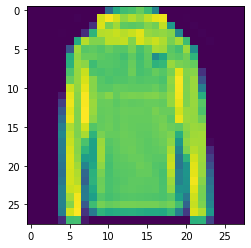

In [8]:
import numpy as np
np.set_printoptions(linewidth=200)
import matplotlib.pyplot as plt
plt.imshow(training_images[24])


In [10]:
print(training_labels[24])
print(training_images[24])

4
[[  0   0   0   0   0   0   0   0   0   0  90 156 177 182 196 176 117   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   2   0   0 239 253 239 214 226 214 231 245 248   0   0   1   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  36 241 203 219 192 190 193 207 200 232 135   0   0   2   0   0   0   0   0   0]
 [  0   0   0   0   1   0   0  33 167 227 229 234 228 234 244 215 211 214 208 120   0   0   2   0   0   0   0   0]
 [  0   0   0   0   0   0 157 227 207 207 229 229 232 207 241 227 235 224 203 221 176   0   0   2   0   0   0   0]
 [  0   0   0   0   0  65 218 189 192 187 196 189 188 202 181 195 222 219 190 180 217 125   0   0   0   0   0   0]
 [  0   0   0   0   0 158 213 196 196 191 188 186 179 192 177 192 126 155 193 189 200 166   0   0   0   0   0   0]
 [  0   0   0   0   0 163 217 211 176 188 188 186 183 196 180 191 165 170 216 204 200 195   0   0   0   0   0   0]
 [  0   0   0   0   0 183 215 234 185 182 186 183 184 198 181 185 195 188 203 

In [11]:
training_images  = training_images / 255.0
test_images = test_images / 255.0

In [12]:
training_images[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.

In [13]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(), 
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

In [14]:
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])



In [15]:
model.fit(training_images, training_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 8s 2ms/step - loss: 0.6299 - accuracy: 0.7837
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3814 - accuracy: 0.8627
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3443 - accuracy: 0.8740
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3134 - accuracy: 0.8840
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2952 - accuracy: 0.8916


In [16]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.3506 - accuracy: 0.8733


[0.35061344504356384, 0.8733000159263611]

In [17]:
classifications = model.predict(test_images)

In [18]:
classifications

array([[7.8271063e-07, 9.3412160e-07, 5.9099989e-08, ..., 1.4433680e-02, 5.3528340e-05, 9.7911465e-01],
       [4.3668111e-05, 1.4274312e-09, 9.9268770e-01, ..., 1.3263801e-12, 1.6588382e-07, 1.4701856e-13],
       [8.4922408e-07, 9.9999917e-01, 1.8675375e-09, ..., 6.2262307e-18, 3.2590004e-11, 4.0839689e-15],
       ...,
       [8.0954056e-04, 5.8237021e-08, 3.1447993e-04, ..., 2.7407788e-07, 9.9716228e-01, 5.1465349e-10],
       [1.6602463e-07, 9.9997246e-01, 1.3693467e-08, ..., 7.0657466e-11, 1.8942362e-08, 1.0286367e-10],
       [3.8686492e-05, 7.4426684e-06, 6.9787005e-05, ..., 4.7955494e-03, 1.9387222e-03, 1.9998554e-04]], dtype=float32)

In [19]:
print(classifications[0])

[7.8271063e-07 9.3412160e-07 5.9099989e-08 7.0108044e-08 1.6626548e-07 6.3960250e-03 6.9732231e-08 1.4433680e-02 5.3528340e-05 9.7911465e-01]


In [20]:
print(test_labels[0])

9


In [6]:
import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(1024, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

2.4.1
Epoch 1/5
1875/1875 [==============================] - 18s 9ms/step - loss: 0.3125
Epoch 2/5
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0774
Epoch 3/5
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0471
Epoch 4/5
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0306
Epoch 5/5
313/313 [==============================] - 2s 4ms/step - loss: 0.0694
[9.8510896e-12 9.6734822e-11 3.3897894e-08 3.8093167e-06 5.0200200e-15
 5.1959292e-10 1.7307096e-13 9.9999619e-01 1.7278726e-10 1.6748305e-09]
7


In [7]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 2s 5ms/step - loss: 0.0694


0.06935714930295944

In [8]:
import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([#tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(64, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

2.4.1
Epoch 1/5


ValueError: in user code:

    C:\Users\User\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:805 train_function  *
        return step_function(self, iterator)
    C:\Users\User\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:795 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\User\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1259 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\User\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2730 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\User\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:3417 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\User\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:788 run_step  **
        outputs = model.train_step(data)
    C:\Users\User\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:755 train_step
        loss = self.compiled_loss(
    C:\Users\User\anaconda3\lib\site-packages\tensorflow\python\keras\engine\compile_utils.py:203 __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    C:\Users\User\anaconda3\lib\site-packages\tensorflow\python\keras\losses.py:152 __call__
        losses = call_fn(y_true, y_pred)
    C:\Users\User\anaconda3\lib\site-packages\tensorflow\python\keras\losses.py:256 call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    C:\Users\User\anaconda3\lib\site-packages\tensorflow\python\util\dispatch.py:201 wrapper
        return target(*args, **kwargs)
    C:\Users\User\anaconda3\lib\site-packages\tensorflow\python\keras\losses.py:1568 sparse_categorical_crossentropy
        return K.sparse_categorical_crossentropy(
    C:\Users\User\anaconda3\lib\site-packages\tensorflow\python\util\dispatch.py:201 wrapper
        return target(*args, **kwargs)
    C:\Users\User\anaconda3\lib\site-packages\tensorflow\python\keras\backend.py:4940 sparse_categorical_crossentropy
        res = nn.sparse_softmax_cross_entropy_with_logits_v2(
    C:\Users\User\anaconda3\lib\site-packages\tensorflow\python\util\dispatch.py:201 wrapper
        return target(*args, **kwargs)
    C:\Users\User\anaconda3\lib\site-packages\tensorflow\python\ops\nn_ops.py:4240 sparse_softmax_cross_entropy_with_logits_v2
        return sparse_softmax_cross_entropy_with_logits(
    C:\Users\User\anaconda3\lib\site-packages\tensorflow\python\util\dispatch.py:201 wrapper
        return target(*args, **kwargs)
    C:\Users\User\anaconda3\lib\site-packages\tensorflow\python\ops\nn_ops.py:4153 sparse_softmax_cross_entropy_with_logits
        raise ValueError("Shape mismatch: The shape of labels (received %s) "

    ValueError: Shape mismatch: The shape of labels (received (32, 1)) should equal the shape of logits except for the last dimension (received (32, 28, 10)).


In [24]:
import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(64, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(5, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

2.4.1
Epoch 1/5


InvalidArgumentError:  Received a label value of 9 which is outside the valid range of [0, 5).  Label values: 7 1 6 1 1 3 8 8 1 8 5 0 4 6 0 4 4 4 4 3 9 2 0 5 6 3 1 9 3 2 8 5
	 [[node sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits (defined at <ipython-input-24-04e5ea87fa1d>:18) ]] [Op:__inference_train_function_32284]

Function call stack:
train_function


In [28]:
import tensorflow as tf

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.85):
      print("\nReached 80% accuracy so cancelling training!")
      self.model.stop_training = True

mnist = tf.keras.datasets.fashion_mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

callbacks = myCallback()

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer=tf.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=10, callbacks=[callbacks])

Epoch 1/10
1875/1875 [==============================] - 11s 5ms/step - loss: 0.5844 - accuracy: 0.7909
Epoch 2/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.3678 - accuracy: 0.8648

Reached 80% accuracy so cancelling training!


In [1]:
import tensorflow as tf
from os import path, getcwd, chdir

# DO NOT CHANGE THE LINE BELOW. If you are developing in a local
# environment, then grab mnist.npz from the Coursera Jupyter Notebook
# and place it inside a local folder and edit the path to that location
path = f"{getcwd()}/../tmp2/mnist.npz"

In [ ]:
def train_mnist():
    # Please write your code only where you are indicated.
    # please do not remove # model fitting inline comments.

    # YOUR CODE SHOULD START HERE
    class myCallback(tf.keras.callbacks.Callback):
      def on_epoch_end(self, epoch, logs={}):
        if(logs.get('acc')>0.99):
          print("\nReached 99% accuracy so cancelling training!")
          self.model.stop_training = True

    # YOUR CODE SHOULD END HERE

    mnist = tf.keras.datasets.mnist

    (x_train, y_train),(x_test, y_test) = mnist.load_data(path=path)
    # YOUR CODE SHOULD START HERE
    x_train, x_test = x_train / 255.0, x_test / 255.0
    callbacks = myCallback()

    # YOUR CODE SHOULD END HERE
    model = tf.keras.models.Sequential([
        # YOUR CODE SHOULD START HERE
        tf.keras.layers.Flatten(input_shape=(28, 28)),
        tf.keras.layers.Dense(1028, activation=tf.nn.relu),
        tf.keras.layers.Dense(10, activation=tf.nn.softmax)
    
        # YOUR CODE SHOULD END HERE
    ])

    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    
    # model fitting
    history = model.fit(x_train, y_train, epochs=10, callbacks=[callbacks])                
              # YOUR CODE SHOULD END HERE
    
    # model fitting
    return history.epoch, history.history['acc'][-1]

In [9]:
train_mnist()

TypeError: cannot unpack non-iterable function object